# DATA 512 FINAL PROJECT

A successful report will take the form of a well-written, well-executed research study document (plus supplementary resources, see the full requirements below) contained in a folder within your Github repository—the same folder that holds your final project plan (Assignment 5).

Your previous deliverables for the final project proposal and plan (assignments 4 and 5) are part of this report: you are expected to build your report by adding more text (and, obviously, code!) to your existing project plan Jupyter Notebook.

Structure of the report
The report should be structured well, with headings and even sub-headings. Most reports should have a structure similar to this one

Introduction
Background or Related Work
Research questions or hypotheses
Methodology
Findings
Discussion (including Limitations and Implications)
Conclusion
References

## Introduction / Motivation

start with some sort of “introduction” or “motivation” section that describes what the study is about, why it is important/interesting, and note any existing research in this area and/or other related work, like articles by journalists.

Contain a description of their dataset and the license or terms of use (unless these are described in the README)

## Background or Related Work

## Research questions or hypotheses

Contain explicit research questions or hypotheses

## Methodology

Describe the methods they used, and explain why these methods are good/appropriate methods to use


## Data Exploration

In [3]:
# change the current working directory - use relative references later
import os
os.chdir('/home/jovyan/data-512/data-512-final/data-512-final')

Since multiple files are going to be downloaded from the internet. We'll define a method to retreive the data.

In [4]:
def get_data(zip_file_url):
    """
    Input: Website to extract zip file.
    Output:  Extracted data in '/raw_data' folder
    """
    import requests, zipfile, io
    r = requests.get(zip_file_url)
    if r.ok:
        print('Request Succesful.')
    else:
        print('Error submitting request.')
        
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall('./raw_data')

Call the method multiple times to save the files in the appropriate place.

In [5]:
%%capture
import pandas as pd
import numpy as np

# download state by state data, store this in a data frame
BASE_URL = 'https://www.usfinancialcapability.org/downloads/'

file_list = ['NFCS_2018_State_by_State_Data_Excel.zip', 'NFCS_2018_Inv_Data_Excel.zip']

for filename in file_list:
    get_data(zip_file_url = BASE_URL + filename)
        
# read the state by state data into a dataframe
df_sbs = pd.read_csv('raw_data/NFCS 2018 State Data 190603.csv')

# read the investor data into a dataframe
df_inv = pd.read_csv('raw_data/NFCS 2018 Investor Data 191107.csv')

Now we can check our import results.

In [6]:
# Check the import results.
display(df_sbs.head())
display(df_inv.head())

,NFCSID,STATEQ,CENSUSDIV,CENSUSREG,A3,A3Ar_w,A3B,A4A_new_w,A5_2015,A6,...,M42,M6,M7,M8,M31,M9,M10,wgt_n2,wgt_d2,wgt_s3
0,2018010001,48,9,4,2,5,11,1,5,4,...,,1,3,98,98,98,1,0.683683,0.519642,1.095189
1,2018010002,10,5,3,2,2,8,1,6,1,...,,1,3,98,3,1,98,0.808358,2.516841,0.922693
2,2018010003,44,7,3,2,2,8,1,6,1,...,,1,1,98,98,1,98,1.021551,1.896192,0.671093
3,2018010004,10,5,3,2,1,7,1,6,2,...,7,98,98,4,4,2,98,0.808358,2.516841,0.922693
4,2018010005,13,8,4,1,2,2,1,6,1,...,,1,3,98,2,1,98,0.448075,0.614733,1.232221


,NFCSID,A1,A2,A3,B2_1,B2_2,B2_3,B2_4,B2_5,B2_7,...,G12,G13,H2,H3,WGT1,S_Gender,S_Age,S_Ethnicity,S_Education,S_Income
0,2018010042,2,1,1,98,98,1,1,98,2,...,3,4,1,2,0.910655,2,3,1,1,2
1,2018010047,1,1,1,1,1,1,1,1,2,...,2,2,1,1,1.566608,1,1,2,2,2
2,2018010050,2,1,1,1,1,2,2,2,2,...,98,98,1,2,0.609443,2,3,1,2,2
3,2018010051,1,1,1,2,2,1,2,1,2,...,1,4,1,2,0.609443,1,3,1,2,2
4,2018010053,1,1,1,1,1,1,1,2,1,...,3,4,1,1,0.609443,1,3,1,2,3


In [7]:
import pandas as pd
import numpy as np
import os

# import libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# magic code for viewing plots using jupyter notebooks:
%matplotlib inline

---
# DEMOGRAPHICS
There were a total of 27,091 respondents in the survey.   A higher number of respondents identified as female.

Gender
Female    15135
Male      11956
dtype: int64


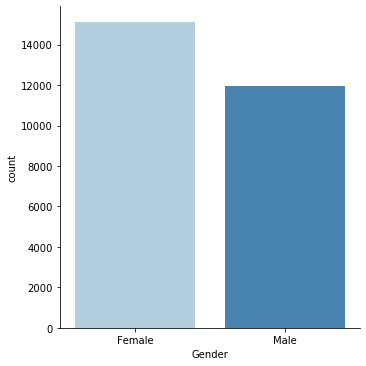

In [8]:
# create a nicer column for gender
df_sbs['Gender'] = df_sbs['A3'].apply(lambda x: 'Male' if x == 1 else 'Female')

# print the number in each gender
print(df_sbs[['Gender']].value_counts())

# plot the gender distribution
sns.catplot(x="Gender", 
            kind="count", 
            data=df_sbs,
            palette=("Blues"))

---
# PARTICIPATION
Initially it appears that quite a bit of the female respondents hold an investment account

Text(0.5, 0.98, 'Do you or your spouse hold an employer-provided retirement account?')

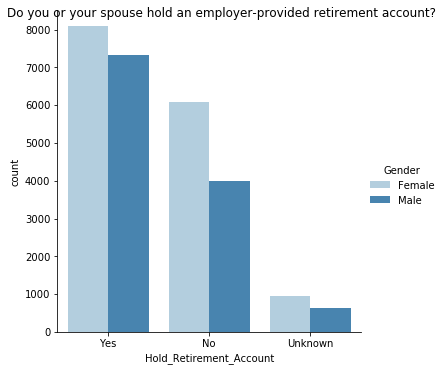

In [22]:
# who has access to an investment account

# create a clean column with labels
def set_employer_retirement_accounts(score):
    if score == 1:
        return 'Yes'
    elif score == 2:
        return 'No'
    else:
        return "Unknown"
        
df_sbs['Hold_Retirement_Account'] = df_sbs.apply(lambda x: set_employer_retirement_accounts(x['C1_2012']),axis=1)

# plot the gender distribution
g3 = sns.catplot(x="Hold_Retirement_Account", 
            kind="count",
            hue='Gender',
            data=df_sbs,
            order=["Yes", "No", "Unknown"],
            palette=("Blues"))
g3.fig.suptitle('Do you or your spouse hold an employer-provided retirement account?') 

Looking at those results as a percentage of respondents, about 53.5% of female respondents hold a retirement account while about 61.2% of male respondents hold a retirement account.  Out of 27,000 respondents about 15,000 have 

Text(0.5, 0.98, 'Do you or your spouse hold another type of retirement account?')

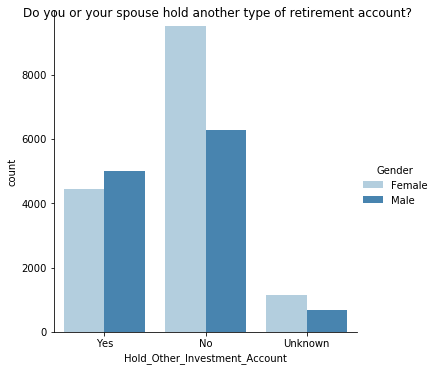

In [23]:
# who has access to an investment account

# create a clean column with labels
def set_self_retirement_accounts(score):
    if score == 1:
        return 'Yes'
    elif score == 2:
        return 'No'
    else:
        return "Unknown"
        
df_sbs['Hold_Other_Investment_Account'] = df_sbs.apply(lambda x: set_self_retirement_accounts(x['C4_2012']),axis=1)

# plot the gender distribution
g3 = sns.catplot(x="Hold_Other_Investment_Account", 
            kind="count",
            hue='Gender',
            data=df_sbs,
            order=["Yes", "No", "Unknown"],
            palette=("Blues"))
g3.fig.suptitle('Do you or your spouse hold another type of retirement account?') 

Text(0.5, 0.98, 'Do you or your spouse hold another type of investment account?')

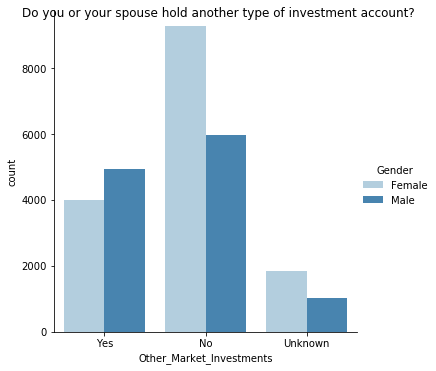

In [31]:
# who has access to an investment account

# create a clean column with labels
def set_investment_accounts(score):
    if score == '1':
        return 'Yes'
    elif score == '2':
        return 'No'
    else:
        return "Unknown"
        
df_sbs['Other_Market_Investments'] = df_sbs.apply(lambda x: set_investment_accounts(x['B14']),axis=1)

# plot the gender distribution
g5 = sns.catplot(x="Other_Market_Investments", 
            kind="count",
            hue='Gender',
            data=df_sbs,
            order=["Yes", "No", "Unknown"],
            palette=("Blues"))
g5.fig.suptitle('Do you or your spouse hold another type of investment account?') 

Text(0.5, 0.98, 'Do you participate in the market in some way?')

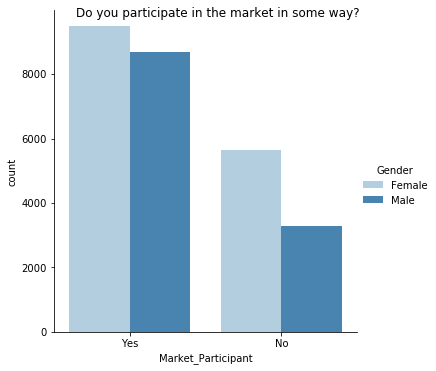

In [35]:
# who has access to an investment account

# create a clean column with labels
def set_participant(account1, account2, account3):
    if 'Yes' in {account1, account2, account3}:
        return 'Yes'
    else:
        return "No"
        
df_sbs['Market_Participant'] = df_sbs.apply(lambda x: set_participant(x['Hold_Retirement_Account'], x['Hold_Other_Investment_Account'], x['Other_Market_Investments']),axis=1)

# plot the gender distribution
g5 = sns.catplot(x="Market_Participant", 
            kind="count",
            hue='Gender',
            data=df_sbs,
            order=["Yes", "No"],
            palette=("Blues"))
g5.fig.suptitle('Do you participate in the market in some way?') 

In [40]:
df_sbs[(df_sbs['Gender'] =='Female')][['Gender','Market_Participant']].value_counts(normalize=True)

Gender  Market_Participant
Female  Yes                   0.62775
        No                    0.37225
dtype: float64

In [38]:
df_sbs[(df_sbs['Gender'] =='Male')][['Gender','Market_Participant']].value_counts(normalize=True)

Gender  Market_Participant
Male    Yes                   0.725828
        No                    0.274172
dtype: float64

In other words, about 62% of all female respondents participated in the market in some way.   However, about 72% of males particpate in the market in some way.

In [10]:
df_sbs[(df_sbs['Hold_Retirement_Account'] =='Yes')][['Gender','Hold_Retirement_Account']].value_counts()

Gender  Hold_Retirement_Account
Female  Yes                        8099
Male    Yes                        7322
dtype: int64

It's difficult to see who's account these actually belong to.   There is a lot of unknown data.   Not clear the gender of the partner, lots of respondents with unknown or non responses to this question.

Text(0.5, 0.98, 'Who owns the retirement account?')

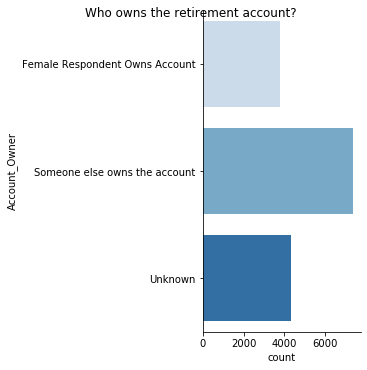

In [11]:
# create a clean column with labels
def who_owns_account(gender, account, owner):
    if account == 'Yes':
        if gender == 'Female' and owner in ('1', '3'):
            return 'Female Respondent Owns Account'
        elif  owner in ('98','99', ' '):
            return 'Unknown'
        else:
            return "Someone else owns the account"


df_sbs['Account_Owner'] = df_sbs.apply(lambda x: who_owns_account(x['Gender'], x['Hold_Retirement_Account'], x['C2_2012']),axis=1)


g3 = sns.catplot(y="Account_Owner", 
            kind="count",
            data=df_sbs.where(df_sbs['C1_2012'] == 1),
            order=['Female Respondent Owns Account', "Someone else owns the account", "Unknown"],
            palette=("Blues"))
g3.fig.suptitle('Who owns the retirement account?')

In [12]:
df_sbs[(df_sbs['Gender'] =='Female')][['Gender','Account_Owner']].value_counts(normalize=True)

Gender  Account_Owner                 
Female  Female Respondent Owns Account    0.465613
        Unknown                           0.303988
        Someone else owns the account     0.230399
dtype: float64

---
# ATTITUDES

Who knows more about investing?   There's not  a huge knowledge gap.

In [ ]:
# create a clean column with labels
def set_knowledge(gender, knower):
    if gender == 'Female' and knower in ('1'):
        return 'Female Respondent Knows More'
    if gender == 'Male' and knower in ('1'):
        return 'Male Respondent Knows More'
    else:
        return 'Other'
        
df_sbs['Investment_Knowledge'] = df_sbs.apply(lambda x: set_knowledge(x['Gender'], x['A14']),axis=1)


g3 = sns.catplot(y="Investment_Knowledge", 
            kind="count",
            data=df_sbs,
            palette=("Blues"))
g3.fig.suptitle('Who knows about investing?')

Fear about financial products, not a lot of fear compared to men

Let's look at the access to capital for women vs. men:

In [ ]:
# create a clean column with labels
def income_categories(score):
    switcher = {
        1: "Less than \$15,000",
        2: "At least \$15,000 but less than \$25,000",
        3: "At least \$25,000 but less than \$35,000",
        4: "At least \$35,000 but less than \$50,000",
        5: "At least \$50,000 but less than \$75,000",
        6: "At least \$75,000 but less than \$100,000",
        7: "At least \$100,000 but less than \$150,000",
        8: "\$150,000 or more",
        98: "Unknown",
        99: "Unknown"
    }
    return switcher.get(score, "Unknown")
        
df_sbs['Income_Category'] = df_sbs.apply(lambda x: income_categories(x['A8']),axis=1)

# plot the gender distribution
sns.catplot(y="Income_Category", 
            kind="count", 
            data=df_sbs.sort_values(['A8']),
            hue="Gender",
            palette=("Blues"))

In [ ]:
# create a clean column with labels
def set_spending(score):
    switcher = {
        1: "Very difficult",
        2: "Somewhat difficult",
        3: "Not at all difficult",
        98: "Unknown",
        99: "Unknown"
    }
    return switcher.get(score, "Unknown")
        
df_sbs['Spending_vs_Income'] = df_sbs.apply(lambda x: set_spending(x['J4']),axis=1)

# plot the gender distribution
sns.catplot(y="Spending_vs_Income", 
            kind="count", 
            data=df_sbs,
            hue="Gender",
            palette=("Blues"))

General feelings about discussing finanaces:

Text(0.5, 0.98, 'Discussing My Finances Makes Me Feel Stressed')

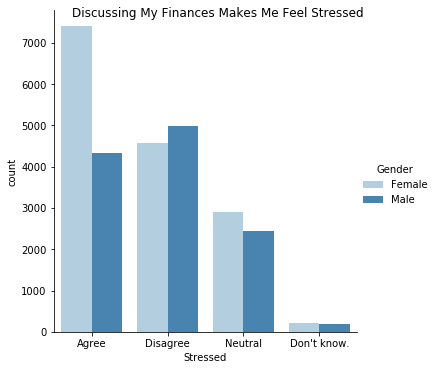

In [11]:

# create a clean column with labels
def financial_stress(score):
    if score <= 3:
        return 'Disagree'
    elif score == 4:
        return 'Neutral'
    elif score <= 7:
        return "Agree"
    else:
        return "Don't know."
        
df_sbs['Stressed'] = df_sbs.apply(lambda x: financial_stress(x['J33_41']),axis=1)

# plot the gender distribution
g2 = sns.catplot(x="Stressed", 
            kind="count",
            hue='Gender',
            data=df_sbs,
            palette=("Blues"))
g2.fig.suptitle('Discussing My Finances Makes Me Feel Stressed') # can also get the figure from plt.gcf()

41% of males report feeling stressed about discussing finances while 49% of females discuss feeling stressed.

Let's look at the types of employment.

In [1]:
# create a clean column with labels
def set_employment_status(score):
    switcher = {
        1: "Self-employed",
        2: "Work full-time for an employer",
        3: "Work part-time for an employer",
        4: "Homemaker",
        5: "Full-time student",
        6: "Permanently sick, disabled, or unable to work",
        7: "Unemployed or temporarily laid off",
        8: "Retired",
        99: "Unknown"
    }
    return switcher.get(score, "Unknown")
        
df_sbs['Employment_Status'] = df_sbs.apply(lambda x: set_employment_status(x['A9']),axis=1)

# plot the gender distribution
sns.catplot(y="Employment_Status", 
            kind="count", 
            data=df_sbs,
            hue="Gender",
            palette=("Blues"))

NameError: name 'df_sbs' is not defined

It's clear that an overwhelming majority of full-time respondents are male.   If we group this, we see


In [ ]:
# create a clean column with labels
def set_fulltime_employment_status(score):
    switcher = {
        1: "Other",
        2: "Full-time",
        3: "Part-time",
        4: "Other",
        5: "Other",
        6: "Other",
        7: "Other",
        8: "Retired",
        99: "Unknown"
    }
    return switcher.get(score, "Unknown")
        
df_sbs['Fulltime_Employment_Status'] = df_sbs.apply(lambda x: set_fulltime_employment_status(x['A9']),axis=1)

# plot the gender distribution
sns.catplot(y="Fulltime_Employment_Status", 
            kind="count", 
            data=df_sbs,
            hue="Gender",
            order=["Full-time","Part-time","Other","Retired"],
            palette=("Blues"))

In [ ]:
# this is clearly a likely entry point for investment
# plot the gender distribution
sns.catplot(y="Fulltime_Employment_Status", 
            kind="count", 
            data=df_sbs[~df_sbs.Hold_Investment_Account.eq("Don't know")],
            hue="Hold_Investment_Account",
            order=["Full-time","Part-time","Other","Retired"],
            palette=("Greens"))

## Findings

## Discussion (including Limitations and Implications)

Summarize the findings, and what they mean (implications for business, design, further research, public policy, etc). An explicit “Discussion” “Conclusion” and “Limitations” section are great! But there are other ways to organize this information too. It just needs to be there in some form.

## Conclusion

## References